### ------------------------------------------
## Number of Affected Vehicles
### ------------------------------------------

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

region = 'Brazilian'
number_of_clusters = 3

value_list = []
date_list = []
for k in range(2010, 2021):
    value_list.append(k*365)
    date_list.append(f'01/01/{k}')

In [2]:
# here we open the database (from a .xlsx file)
if region == 'Brazilian':
    df = pd.read_excel(r"Brasil_Recall.xlsx")
    df = df[(df['Setor']=='Automotivos') | (df['Setor']=='Ciclomotores') | (df['Setor']=='Veículos Automotores')]
    df = df[df['Quantidade Afetada'] > 0]
    df['Day'] = df['Data Início'].str[:2].astype(int)
    df['Month'] = df['Data Início'].str[3:5].astype(int)
    df['Year'] = df['Data Início'].str[-4:].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Affected Vehicles'] = df['Quantidade Afetada']
    df['Numerical Date'] = df['Numerical Date']
    #filter: only >2010 and < 2020
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Título','Tipo de Risco','País de Origem','Numerical Date','Affected Vehicles']]
elif region == 'American':
    df = pd.read_excel(r"EUA_Recall_Code_Clustering.xlsx")
    df = df[df['Potential number of units affected'] > 0]
    df = df.drop_duplicates(subset='NHTSA campaign number', keep="last")
    df['Report received date'] = df['Report received date'].astype(str)
    df['Day'] = df['Report received date'].str[6:8].astype(int)
    df['Month'] = df['Report received date'].str[4:6].astype(int)
    df['Year'] = df['Report received date'].str[:4].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Affected Vehicles'] = df['Potential number of units affected']
    df['Numerical Date'] = df['Numerical Date']
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Numerical Date','Affected Vehicles']]

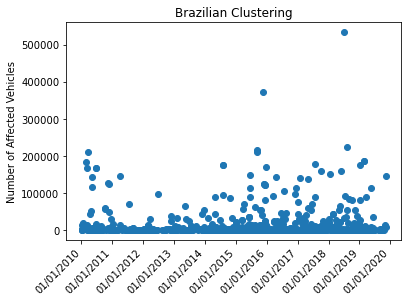

In [3]:
# let's see our data
#df=df[df['Adjusted Affected Vehicles']<8] #taking outliers out
two_dimensional_array = df[['Numerical Date','Affected Vehicles']]
plt.title(f"{region} Clustering")
#plt.xlabel("Numerical Date")
plt.ylabel("Number of Affected Vehicles")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Affected Vehicles'], label='True Position')

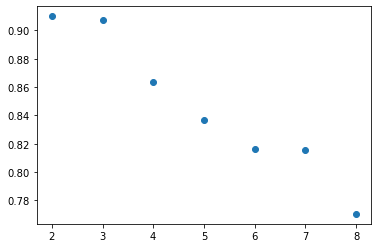

In [4]:
sil = []
number = []
kmax = number_of_clusters + 5

#finding the optimal number of clusters
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    number.append(k)
    kmeans = KMeans(n_clusters = k).fit(two_dimensional_array)
    labels = kmeans.labels_
    sil.append(silhouette_score(two_dimensional_array, labels, metric = 'euclidean'))
plt.scatter(number, sil)

# There is a clear peak at k = 3. Hence, it is optimal.
# metodo de Silhouette (https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

In [5]:
# Finally, the data can be optimally clustered into 3 clusters as shown below.
# creating the model
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(two_dimensional_array)
centroids = kmeans.cluster_centers_
print(centroids)

[[735800.84478936   4680.65631929]
 [735684.75925926 131525.7037037 ]
 [736275.5        452846.5       ]]


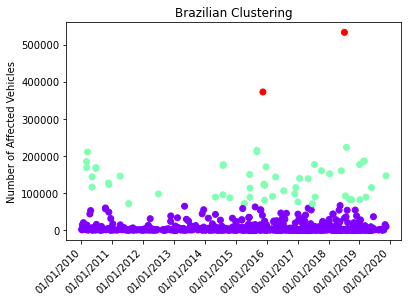

In [6]:
plt.title(f"{region} Clustering")
#plt.xlabel("Numerical Date")
plt.ylabel("Number of Affected Vehicles")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Affected Vehicles'], c=kmeans.labels_, cmap='rainbow')


### ------------------------------------------
## Number of Calls (day)
### ------------------------------------------

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

region = 'Brazilian'
number_of_clusters = 3

In [8]:
# here we open the database (from a .xlsx file)
if region == 'Brazilian':
    df = pd.read_excel(r"Brasil_Recall.xlsx")
    df = df[(df['Setor']=='Automotivos') | (df['Setor']=='Ciclomotores') | (df['Setor']=='Veículos Automotores')]
    df = df[df['Quantidade Afetada'] > 0]
    df['Day'] = df['Data Início'].str[:2].astype(int)
    df['Month'] = df['Data Início'].str[3:5].astype(int)
    df['Year'] = df['Data Início'].str[-4:].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    #df['Numerical Date'] = df['Month']*30 + df['Year']*365
    #df['Affected Vehicles'] = df['Quantidade Afetada']
    df['Numerical Date'] = df['Numerical Date']
    #filter: only >2010 and < 2020
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Título','Numerical Date']]
    df = df.groupby('Numerical Date').agg({'Título':'count'}).reset_index().rename(columns={'Título':'Number of calls per day'})
elif region == 'American':
    df = pd.read_excel(r"EUA_Recall_Code_Clustering.xlsx")
    df = df[df['Potential number of units affected'] > 0]
    df['Report received date'] = df['Report received date'].astype(str)
    df['Day'] = df['Report received date'].str[6:8].astype(int)
    df['Month'] = df['Report received date'].str[4:6].astype(int)
    df['Year'] = df['Report received date'].str[:4].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    #df['Affected Vehicles'] = df['Potential number of units affected']
    df['Numerical Date'] = df['Numerical Date']
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Numerical Date','NHTSA campaign number']]
    df = df.groupby('Numerical Date').agg({'NHTSA campaign number':'count'}).reset_index().rename(columns={'NHTSA campaign number':'Number of calls per day'})


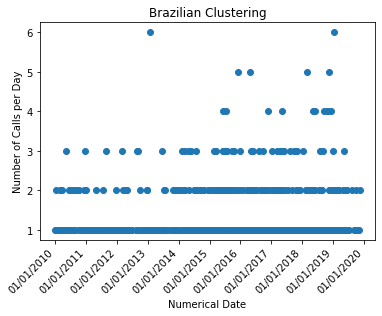

In [9]:
# let's see our data
#df=df[df['Adjusted Affected Vehicles']<8] #taking outliers out
two_dimensional_array = df[['Numerical Date','Number of calls per day']]
plt.title(f"{region} Clustering")
plt.xlabel("Numerical Date")
plt.ylabel("Number of Calls per Day")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Number of calls per day'], label='True Position')

Text(0.5, 1.0, 'Silhoutte Score')

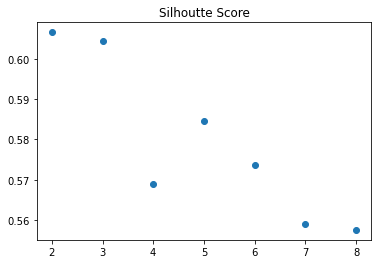

In [10]:
sil = []
number = []
kmax = number_of_clusters + 5

#finding the optimal number of clusters
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    number.append(k)
    kmeans = KMeans(n_clusters = k).fit(two_dimensional_array)
    labels = kmeans.labels_
    sil.append(silhouette_score(two_dimensional_array, labels, metric = 'euclidean'))
plt.scatter(number, sil)
plt.title(f"Silhoutte Score")

In [11]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(two_dimensional_array)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.35606159e+05 1.46861925e+00]
 [7.34303229e+05 1.27450980e+00]
 [7.36649170e+05 1.43055556e+00]]


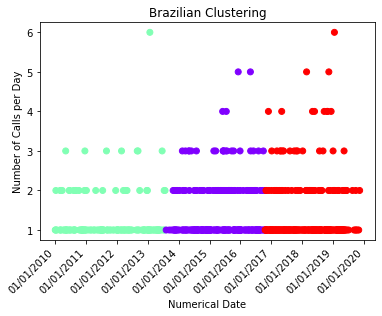

In [12]:
plt.title(f"{region} Clustering")
plt.xlabel("Numerical Date")
plt.ylabel("Number of Calls per Day")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Number of calls per day'], c=kmeans.labels_, cmap='rainbow')

### ------------------------------------------
## Number of Calls (month)
### ------------------------------------------

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

region = 'American'
number_of_clusters = 3

In [27]:
# here we open the database (from a .xlsx file)
if region == 'Brazilian':
    df = pd.read_excel(r"Brasil_Recall.xlsx")
    df = df[(df['Setor']=='Automotivos') | (df['Setor']=='Ciclomotores') | (df['Setor']=='Veículos Automotores')]
    df = df[df['Quantidade Afetada'] > 0]
    df['Day'] = df['Data Início'].str[:2].astype(int)
    df['Month'] = df['Data Início'].str[3:5].astype(int)
    df['Year'] = df['Data Início'].str[-4:].astype(int)
    #df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Numerical Date'] = df['Month']*30 + df['Year']*365
    #df['Affected Vehicles'] = df['Quantidade Afetada']
    df['Numerical Date'] = df['Numerical Date']
    #filter: only >2010 and < 2020
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Título','Numerical Date']]
    df = df.groupby('Numerical Date').agg({'Título':'count'}).reset_index().rename(columns={'Título':'Number of calls per month'})
elif region == 'American':
    df = pd.read_excel(r"EUA_Recall_Code_Clustering.xlsx")
    df = df[df['Potential number of units affected'] > 0]
    df = df.drop_duplicates(subset='NHTSA campaign number', keep="last")
    df['Report received date'] = df['Report received date'].astype(str)
    df['Day'] = df['Report received date'].str[6:8].astype(int)
    df['Month'] = df['Report received date'].str[4:6].astype(int)
    df['Year'] = df['Report received date'].str[:4].astype(int)
    #df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Numerical Date'] = df['Month']*30 + df['Year']*365
    #df['Affected Vehicles'] = df['Potential number of units affected']
    df['Numerical Date'] = df['Numerical Date']
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Numerical Date','NHTSA campaign number']]
    df = df.groupby('Numerical Date').agg({'NHTSA campaign number':'count'}).reset_index().rename(columns={'NHTSA campaign number':'Number of calls per month'})


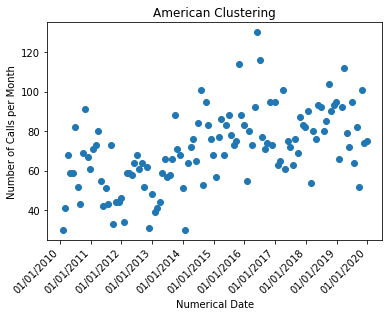

In [28]:
# let's see our data
#df=df[df['Adjusted Affected Vehicles']<8] #taking outliers out
two_dimensional_array = df[['Numerical Date','Number of calls per month']]
plt.title(f"{region} Clustering")
plt.xlabel("Numerical Date")
plt.ylabel("Number of Calls per Month")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Number of calls per month'], label='True Position')

Text(0.5, 1.0, 'Silhoutte Score')

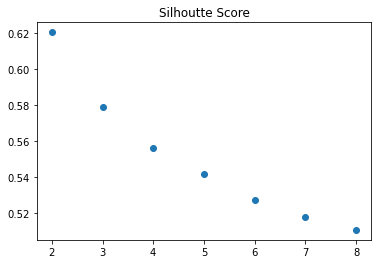

In [29]:
sil = []
number = []
kmax = number_of_clusters + 5

#finding the optimal number of clusters
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    number.append(k)
    kmeans = KMeans(n_clusters = k).fit(two_dimensional_array)
    labels = kmeans.labels_
    sil.append(silhouette_score(two_dimensional_array, labels, metric = 'euclidean'))
plt.scatter(number, sil)
plt.title("Silhoutte Score")

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(two_dimensional_array)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.36688780e+05 8.05121951e+01]
 [7.35457125e+05 7.61000000e+01]
 [7.34255769e+05 5.54102564e+01]]


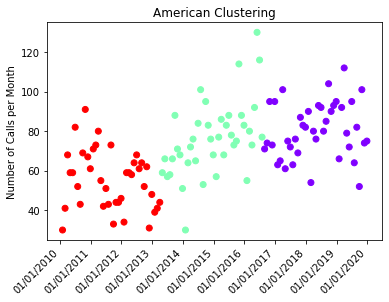

In [31]:
plt.title(f"{region} Clustering")
# plt.xlabel("Numerical Date")
plt.ylabel("Number of Calls per Month")
plt.xticks(value_list, date_list,rotation=45, ha="right")
plt.scatter(df['Numerical Date'],df['Number of calls per month'], c=kmeans.labels_, cmap='rainbow')

### ------------------------------------------
## Number of Calls per Number of affected vehicles
### ------------------------------------------

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

region = 'American'
number_of_clusters = 3

In [21]:
# here we open the database (from a .xlsx file)
if region == 'Brazilian':
    df = pd.read_excel(r"Brasil_Recall.xlsx")
    df = df[(df['Setor']=='Automotivos') | (df['Setor']=='Ciclomotores') | (df['Setor']=='Veículos Automotores')]
    df = df[df['Quantidade Afetada'] > 0]
    df['Day'] = df['Data Início'].str[:2].astype(int)
    df['Month'] = df['Data Início'].str[3:5].astype(int)
    df['Year'] = df['Data Início'].str[-4:].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Numerical Date'] = df['Month']*30 + df['Year']*365
    df['Affected Vehicles'] = df['Quantidade Afetada']
    df['Numerical Date'] = df['Numerical Date']
    #filter: only >2010 and < 2020
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Título','Affected Vehicles']]
    df = df.groupby('Affected Vehicles').agg({'Título':'count'}).reset_index().rename(columns={'Título':'Number of calls'})
elif region == 'American':
    df = pd.read_excel(r"EUA_Recall_Code_Clustering.xlsx")
    df = df[df['Potential number of units affected'] > 0]
    df = df.drop_duplicates(subset='NHTSA campaign number', keep="last")
    df['Report received date'] = df['Report received date'].astype(str)
    df['Day'] = df['Report received date'].str[6:8].astype(int)
    df['Month'] = df['Report received date'].str[4:6].astype(int)
    df['Year'] = df['Report received date'].str[:4].astype(int)
    df['Numerical Date'] = df['Day'] + df['Month']*30 + df['Year']*365
    df['Affected Vehicles'] = df['Potential number of units affected']
    df['Numerical Date'] = df['Numerical Date']
    df = df[(df['Numerical Date']>733650) & (df['Numerical Date']<737300)]
    df = df[['Affected Vehicles','NHTSA campaign number']]
    df = df.groupby('Affected Vehicles').agg({'NHTSA campaign number':'count'}).reset_index().rename(columns={'NHTSA campaign number':'Number of calls'})


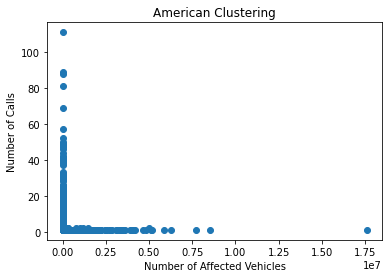

In [22]:
# let's see our data
#df=df[df['Adjusted Affected Vehicles']<8] #taking outliers out
two_dimensional_array = df[['Affected Vehicles','Number of calls']]
plt.title(f"{region} Clustering")
plt.xlabel("Number of Affected Vehicles")
plt.ylabel("Number of Calls")

plt.scatter(df['Affected Vehicles'],df['Number of calls'], label='True Position')

Text(0.5, 1.0, 'Silhoutte Score')

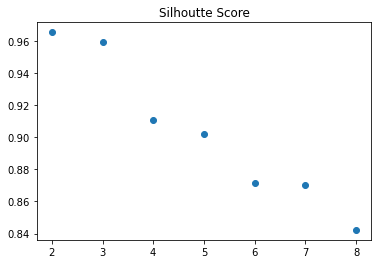

In [23]:
sil = []
number = []
kmax = number_of_clusters + 5

#finding the optimal number of clusters
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    number.append(k)
    kmeans = KMeans(n_clusters = k).fit(two_dimensional_array)
    labels = kmeans.labels_
    sil.append(silhouette_score(two_dimensional_array, labels, metric = 'euclidean'))
plt.scatter(number, sil)
plt.title('Silhoutte Score')

In [24]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(two_dimensional_array)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.24123685e+04 2.15984655e+00]
 [3.79122084e+06 1.03125000e+00]
 [1.76000000e+07 1.00000000e+00]]


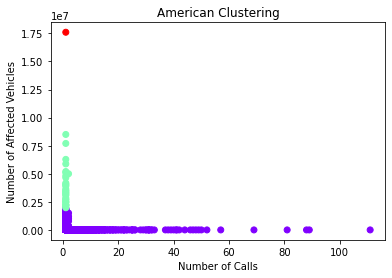

In [25]:
plt.title(f"{region} Clustering")
plt.ylabel("Number of Affected Vehicles")
plt.xlabel("Number of Calls")
plt.scatter(df['Number of calls'],df['Affected Vehicles'], c=kmeans.labels_, cmap='rainbow')